# Example on cross-talk/HBT joint measurement

This example shows a standard workflow on analyzing data from the joint
cross-talk/HBT measurement.

First, import the necessary libraries and define the absolute path to
the folder with the '.dat' data files

In [1]:
from LinoSPAD2.functions import sensor_plot, delta_t, fits
from matplotlib import pyplot as plt
import os

# Absolute path to the folder with the '.dat' data files
path = r"D:\LinoSPAD2\Data\B7d\CT_HBT\70-73"

Next, plot the sensor population plot to see where the two beams are located, "single_file=True" for a quick plot using the first '.dat' file only, and "fit_peaks=True" to find the peaks above "threshold_multiplier=14", which is a median multiplier, and calculate the photon rate for each peak found.


> > > Collecting data for sensor population plot,Working in D:\LinoSPAD2\Data\B7d\CT_HBT\70-73 < < <




> > > Plotting < < <

Fitting the peaks with gaussian
> > > The plot is saved as '{plot_name}_single_file.png'in {os.getcwd()} < < <


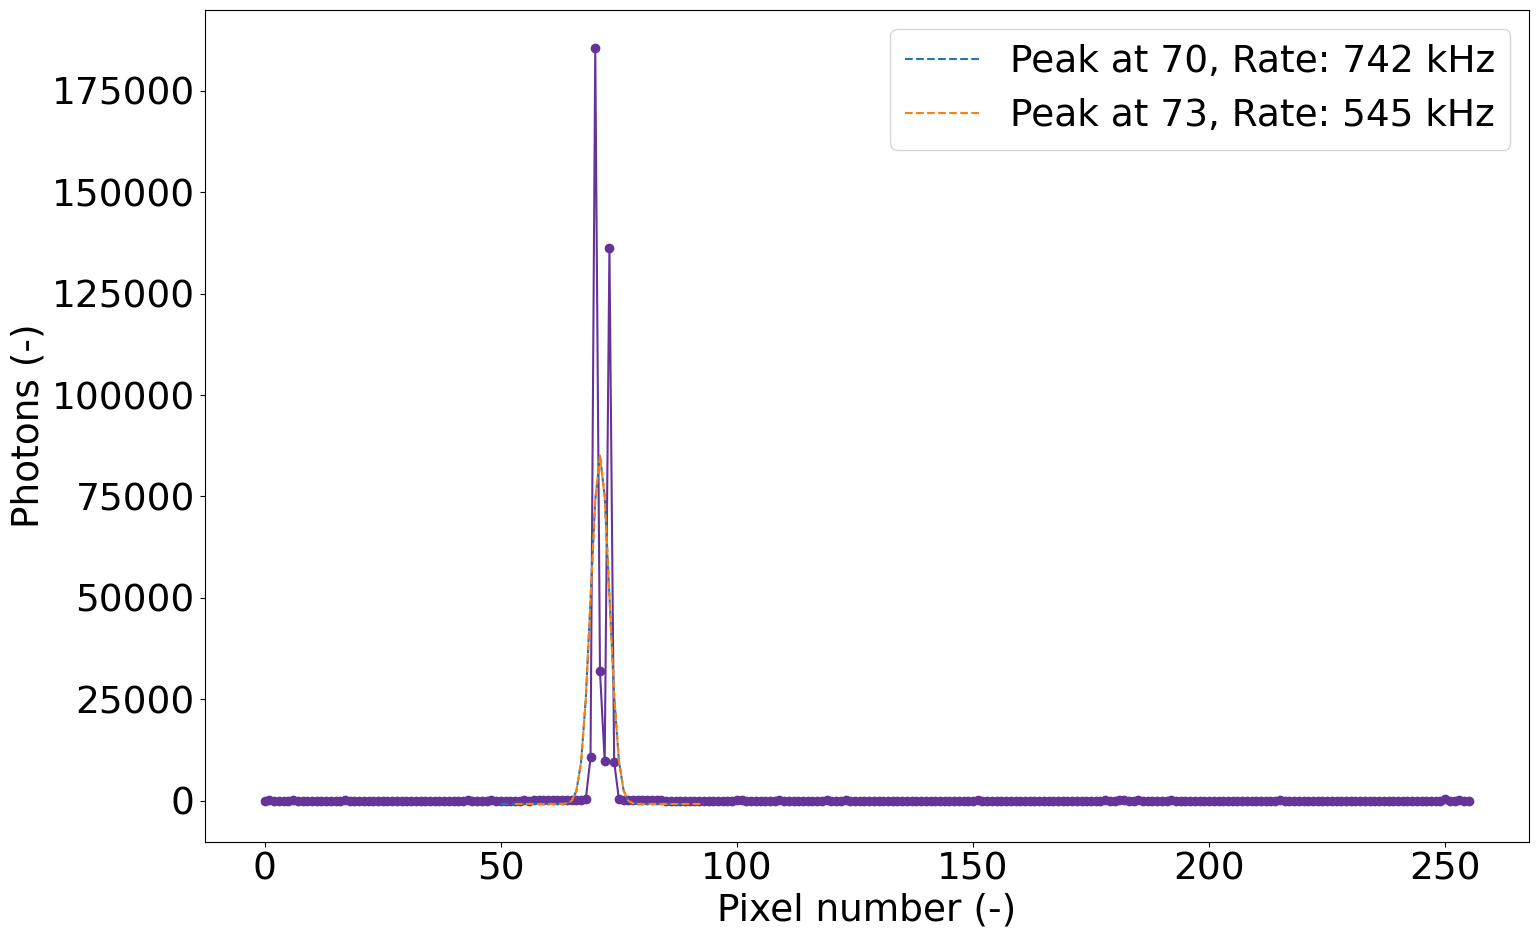

In [3]:
sensor_plot.plot_sensor_population(
    path,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=700,
    fit_peaks=True,
    single_file=True,
    show_fig=True,
    threshold_multiplier=14,
)

Once the beams' positions are known, calculate and save the timestamp differences.

In [4]:
delta_t.calculate_and_save_timestamp_differences_fast(
    path,
    pixels=[70, 73],
    rewrite=True,
    daughterboard_number="B7d",
    motherboard_number="#28",
    firmware_version="2212s",
    timestamps=700,
)


! ! ! Feather file with timestamps differences already exists and will be rewritten ! ! !


! ! ! Deleting the file in 5 ! ! !


! ! ! Deleting the file in 4 ! ! !


! ! ! Deleting the file in 3 ! ! !


! ! ! Deleting the file in 2 ! ! !


! ! ! Deleting the file in 1 ! ! !


> > > Collecting data for delta t plot for the requested pixels and saving it to .feather in a cycle < < <




> > > Timestamp differences are saved as0000019000-0000019199.feather in D:\LinoSPAD2\Data\B7d\CT_HBT\70-73\delta_ts_data < < <


After collecting the timestamp differences, the resulting data can be used to plot a histogram of coincidences.


! ! ! Plot of timestamp differences alreadyexists and will be rewritten ! ! !


> > > Plotting timestamps differences as a grid of histograms < < <


Row in plot: 2it [00:00,  4.07it/s]


> > > Plot is saved as 0000019000-0000019199_delta_t_grid.png in D:\LinoSPAD2\Data\B7d\CT_HBT\70-73/results/delta_t< < <


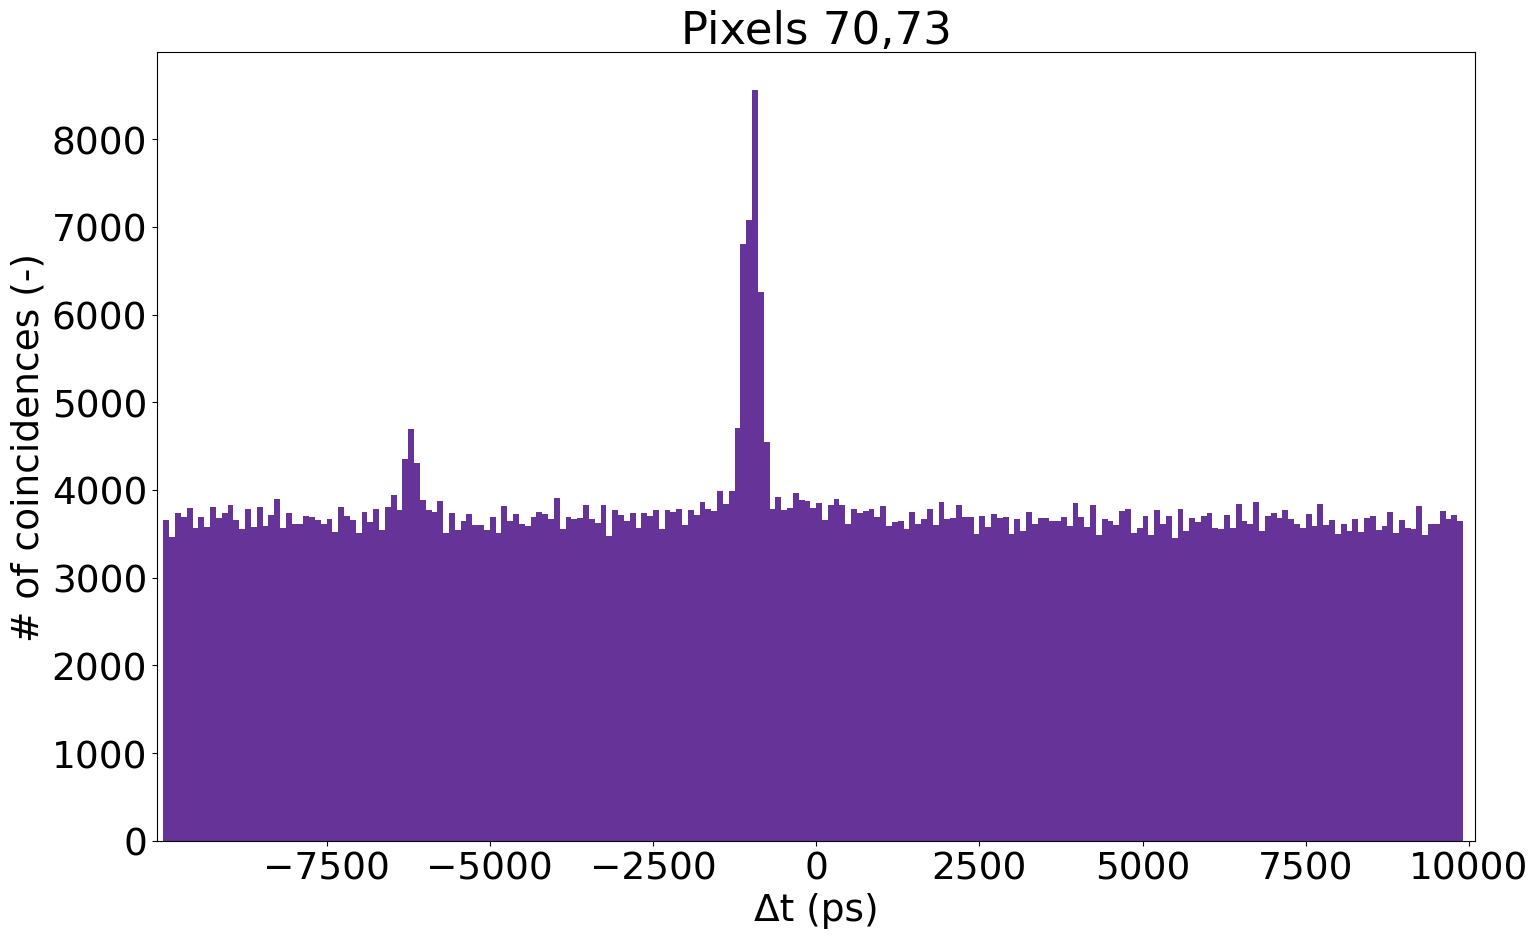

In [5]:
delta_t.collect_and_plot_timestamp_differences(
    path, rewrite=True, pixels=[70, 73], multiplier=5
)

The two peaks seen in the plot above are due to enhancement of random coincidences, one due to the HBT effect, and the other due to cross-talk effect between the two pixels. The setup included an additional 1 m-long single-mode optical fiber, so that the HBT peak is shifted by 5 ns relative to the cross-talk one.

We can fit both pixels to get the peaks' positions, standard deviation, and contrast. HBT's contrast is limited at 100% (from theory), and cross-talk is not limited at all.



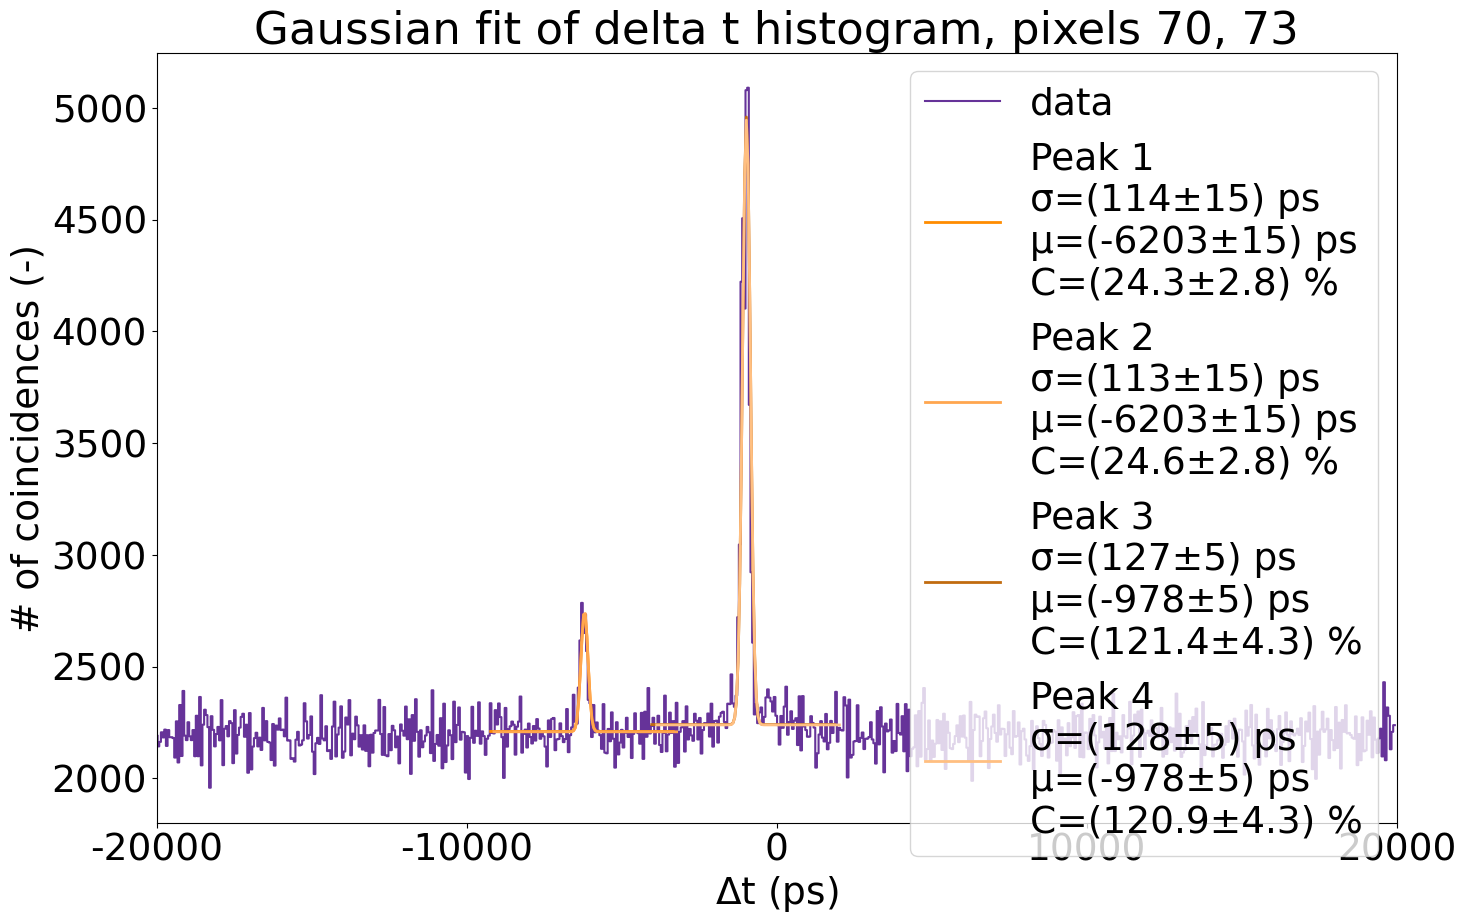

In [2]:
fits.fit_with_gaussian_all(path, pixels=[70, 73], window=20e3, multiplier=3)

The window is too wide, the binning could be coarser, and too many peaks were found.

The fit quality depends on the window width (the "window" parameter), and the binning used, which can be controlled with the "multiplier" parameter that multiplies the minimal bin of 17.857 ps (average LinoSPAD2 TDC bin width). The "threshold_multiplier", which multiplies the median of the histogram, can be set higher until only the two peaks of interest are found.

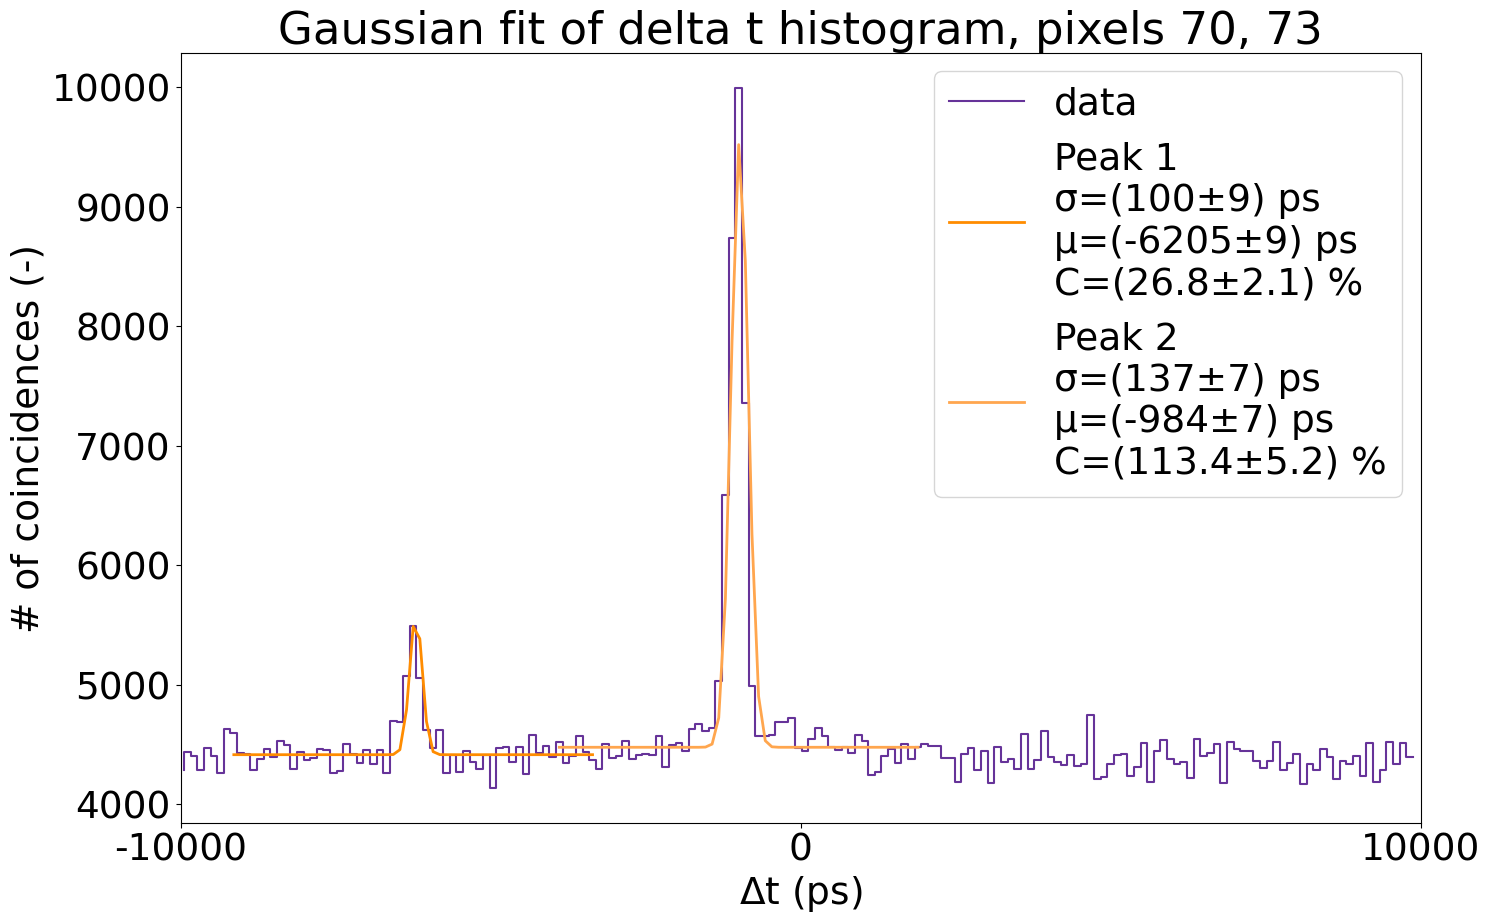

In [3]:
fits.fit_with_gaussian_all(
    path, pixels=[70, 73], window=10e3, multiplier=6, threshold_multiplier=1.23
)

The plot - including the data used for it - can be pickled for later use. For this, the "pickle_figure=True" parameter can be used. The '.pkl' file will be saved in the same folder as the normal '.png' plot: ~/results/fits.

In [5]:
fits.fit_with_gaussian_all(
    path,
    pixels=[70, 73],
    window=10e3,
    multiplier=5,
    threshold_multiplier=1.23,
    pickle_figure=True,
)
plt.close()

Once the plot is pickled, the "unpickle_fit" function from the "fits" module can be used to extract the plot and the data. The only parameter of the function is the absolute path to the pickle plot itself.

In [18]:
# Absolute path to the pickled plot with the fits
path = r"D:\LinoSPAD2\Data\B7d\CT_HBT\70-73\results\fits"  # the folder
file = r"0000019000-0000019199_pixels_70,73_fit.pkl"  # the plot itself
file_path = os.path.join(path, file)  # combined

# The function returns the data for each line (histogram, fits)
plot_data = fits.unpickle_fit(file_path)

# Close the figure
plt.close()

# Show the plot data
print(
    "The output dictionary contains data for:",
    [key for key in plot_data.keys()],
)

plot_data

The output dictionary contains data for: ['Histogram', 'Fit_1', 'Fit_2']


{'Histogram': (array([-9955.35714286, -9866.07142857, -9776.78571429, -9687.5       ,
         -9598.21428571, -9508.92857143, -9419.64285714, -9330.35714286,
         -9241.07142857, -9151.78571429, -9062.5       , -8973.21428571,
         -8883.92857143, -8794.64285714, -8705.35714286, -8616.07142857,
         -8526.78571429, -8437.5       , -8348.21428571, -8258.92857143,
         -8169.64285714, -8080.35714286, -7991.07142857, -7901.78571429,
         -7812.5       , -7723.21428571, -7633.92857143, -7544.64285714,
         -7455.35714286, -7366.07142857, -7276.78571429, -7187.5       ,
         -7098.21428571, -7008.92857143, -6919.64285714, -6830.35714286,
         -6741.07142857, -6651.78571429, -6562.5       , -6473.21428571,
         -6383.92857143, -6294.64285714, -6205.35714286, -6116.07142857,
         -6026.78571429, -5937.5       , -5848.21428571, -5758.92857143,
         -5669.64285714, -5580.35714286, -5491.07142857, -5401.78571429,
         -5312.5       , -5223.2142857

The data can be used for replotting the plot with custom parameters, combining with the others, etc.

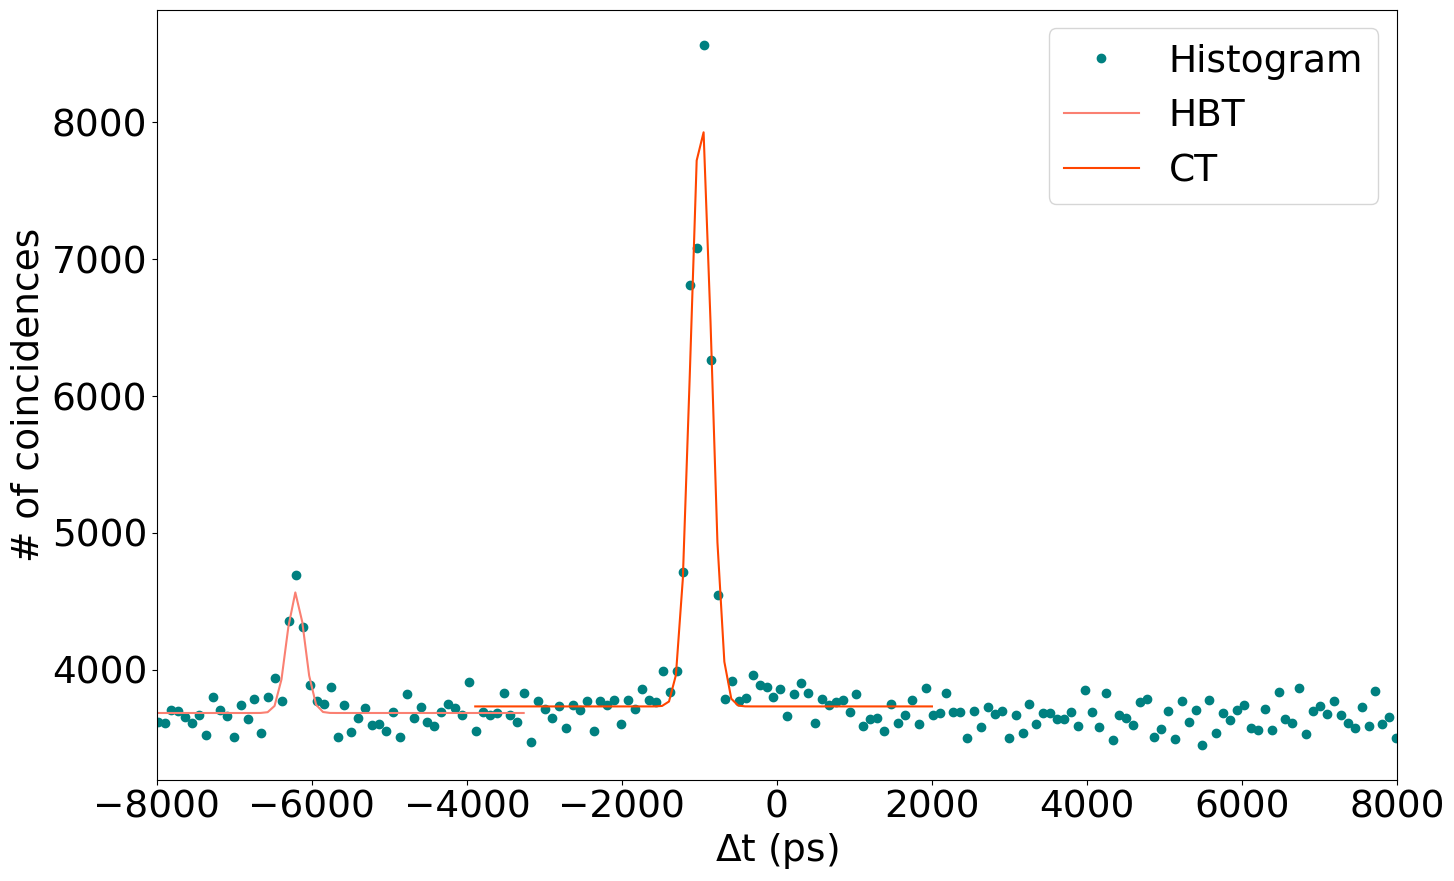

In [8]:
plt.rcParams.update({"font.size": 27})
fig = plt.figure(figsize=(16, 10))
plt.plot(
    plot_data["Histogram"][0],
    plot_data["Histogram"][1],
    "o",
    color="teal",
    label="Histogram",
)
plt.plot(
    plot_data["Fit_1"][0],
    plot_data["Fit_1"][1],
    "-",
    color="salmon",
    label="HBT",
)
plt.plot(
    plot_data["Fit_2"][0],
    plot_data["Fit_2"][1],
    "-",
    color="orangered",
    label="CT",
)
plt.xlim(-8e3, 8e3)
plt.xlabel("$\Delta$t (ps)")
plt.ylabel("# of coincidences")
plt.legend(loc="best")